In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y, sr = librosa.load('0452.wav')

In [4]:
sr 

22050

In [5]:
y

array([-0.00012423, -0.0001069 , -0.00013886, ...,  0.00057355,
        0.00029915,  0.        ], dtype=float32)

In [6]:
len(y)

165369

In [8]:
t = len(y) / sr
t

7.499727891156462

In [9]:
type(y)

numpy.ndarray

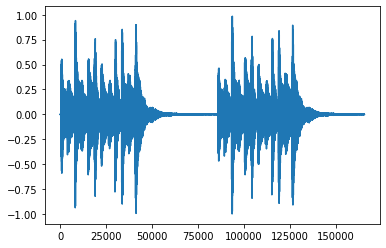

In [11]:
plt.plot(y)

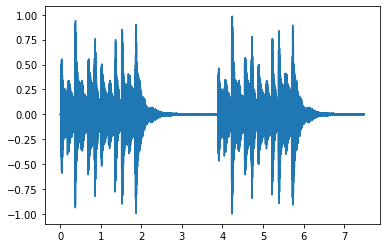

In [12]:
t = np.arange(len(y)) / sr
plt.plot(t, y)


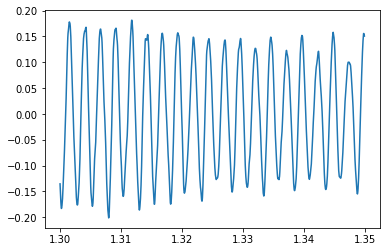

In [13]:
def get_index(t, sr):
    return int(t * sr)

tmin, tmax = 1.3, 1.35
imin, imax = get_index(tmin, sr), get_index(tmax, sr)
plt.plot(t[imin:imax], y[imin:imax])

In [14]:
librosa.output.write_wav('new_tone.wav', y, sr)

In [15]:
librosa.output.write_wav('new_tone.wav', y[:len(y)//2], sr)

In [19]:
import soundfile as sf
import sounddevice as sd

In [20]:

def async_playback(filename):
    data, sr = sf.read(filename)
    sd.play(data, sr)
    return data, sr

data, sr = async_playback('new_tone.wav')

In [21]:
# Hoi tham ve thiet bi
misc = sd.query_devices()
misc

  0 HDA Intel PCH: ALC3246 Analog (hw:0,0), ALSA (2 in, 0 out)
  1 HDA Intel PCH: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
  2 HDA Intel PCH: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
  3 HDA Intel PCH: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
  4 HDA Intel PCH: HDMI 3 (hw:0,9), ALSA (0 in, 8 out)
  5 HDA Intel PCH: HDMI 4 (hw:0,10), ALSA (0 in, 8 out)
  6 sysdefault, ALSA (128 in, 0 out)
  7 hdmi, ALSA (0 in, 8 out)
  8 pulse, ALSA (32 in, 32 out)
* 9 default, ALSA (32 in, 32 out)

In [22]:
# Lưu dữ liệu.
def sync_record(filename, duration, sr, channels):
    print('recording')
    my_rec = sd.rec(samplerate=sr, channels=channels, frames=int(duration*sr))
    sd.wait()
    sf.write(filename, data=my_rec, samplerate=sr)
    print('done recording')
    
sync_record('record.wav', 3, 22050, 1)

recording
done recording
